In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from lib.params import mdn, mdstp, mpip

# 3D simulation
## W/o smearing by resolution

In [3]:
mc = np.load('mc_ddpip_3d.npy')
mc.shape

(33783, 3)

In [4]:
def get_vars(data):
    """ """
    e, mddsq, md1pisq = [data[:,i] for i in range(3)]
    s = (e + mdn + mdstp)**2
    md2pisq = s + 2*mdn**2 + mpip**2 - mddsq - md1pisq
    tdd = np.sqrt(mddsq) - 2*mdn
    md1pi = np.sqrt(md1pisq)
    return (e, tdd, md1pi, mddsq, md1pisq, md2pisq)

In [5]:
e, tdd, md1pi, mddsq, md1pisq, md2pisq = get_vars(mc)

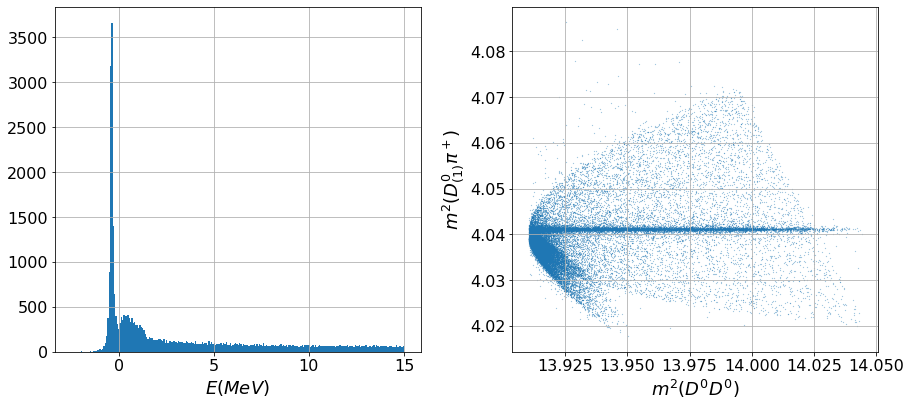

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(13,6))
ax[0].hist(e, bins=250);
ax[0].set_xlabel(r'$E (MeV)$')
ax[0].grid()
ax[1].scatter(mddsq, md1pisq, marker='.', s=0.1);
ax[1].set_xlabel(r'$m^2(D^0D^0)$')
ax[1].set_ylabel(r'$m^2(D^0_{(1)}\pi^+)$');
ax[1].grid()
fig.tight_layout()

In [7]:
def md2pi(data):
    s = (data[:,0]*10**-3 + mdn + mdstp)**2
    return s + mdn**2 + mdn**2 + mpip**2 - data[:,1]- data[:,2]

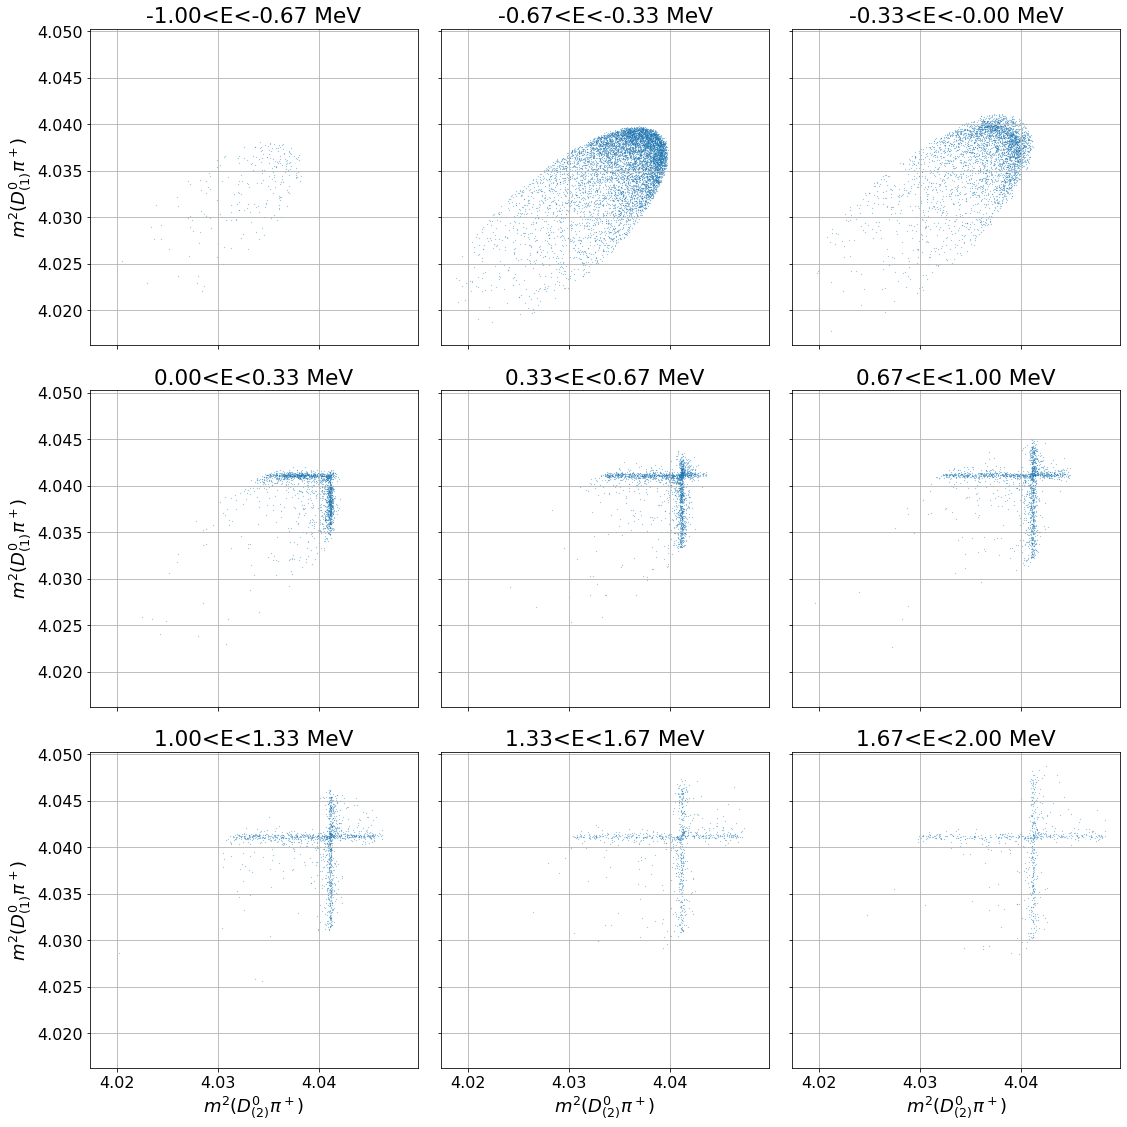

In [8]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(16,16), sharex=True, sharey=True)
lo, hi = -1, 2
delta = (hi - lo) / 9
for i in range(3):
    for j in range(3):
        elo = lo + delta * (3 * i + j)
        ehi = elo + delta
        mask = (mc[:,0] > elo) & (mc[:,0] < ehi)
        ax[i,j].scatter(md2pi(mc[mask]), mc[mask,2], marker='.', s=0.1)
        ax[i,j].grid()
        ax[i,j].set_title(f'{elo:.2f}<E<{ehi:.2f} MeV')
        if j == 0:
            ax[i,j].set_ylabel(r'$m^2(D^0_{(1)}\pi^+)$')
        if i == 2:
            ax[i,j].set_xlabel(r'$m^2(D^0_{(2)}\pi^+)$')
fig.tight_layout()

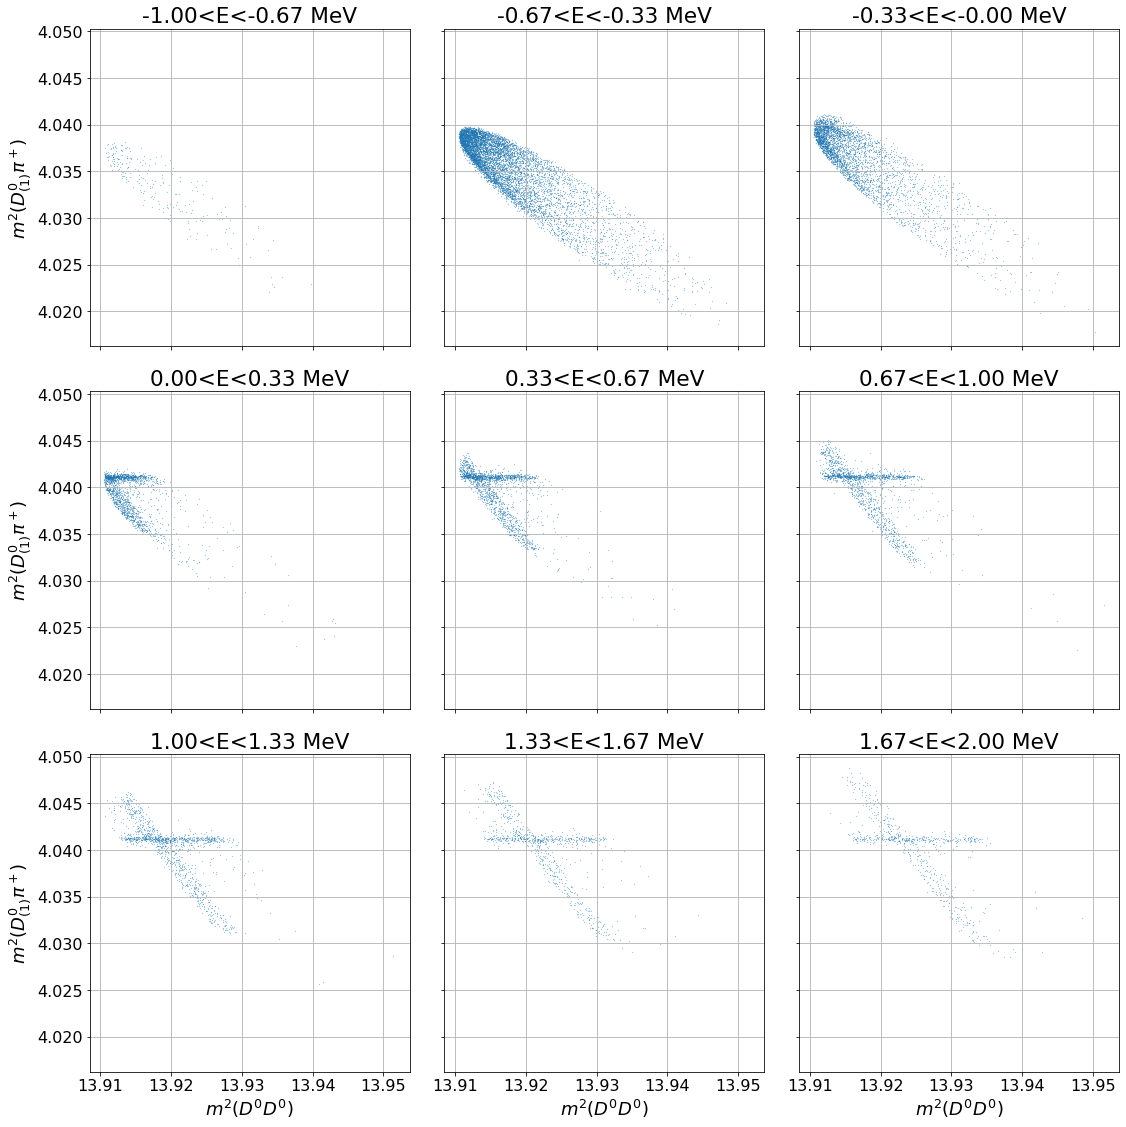

In [9]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(16,16), sharex=True, sharey=True)
lo, hi = -1, 2
delta = (hi - lo) / 9
for i in range(3):
    for j in range(3):
        elo = lo + delta * (3 * i + j)
        ehi = elo + delta
        mask = (mc[:,0] > elo) & (mc[:,0] < ehi)
        ax[i,j].scatter(mc[mask,1], mc[mask,2], marker='.', s=0.1)
        ax[i,j].grid()
        ax[i,j].set_title(f'{elo:.2f}<E<{ehi:.2f} MeV')
        if j == 0:
            ax[i,j].set_ylabel(r'$m^2(D^0_{(1)}\pi^+)$')
        if i == 2:
            ax[i,j].set_xlabel(r'$m^2(D^0D^0)$')
fig.tight_layout()

## W/ smearing by resolution

In [10]:
smc = np.load('mc_ddpip_3d_smeared.npy')
smc.shape

(33783, 3)

In [11]:
assert smc.shape == mc.shape
assert not np.allclose(smc, mc)

Let's look at the offset distributions

In [12]:
se, stdd, smd1pi, smddsq, smd1pisq, smd2pisq = get_vars(smc)

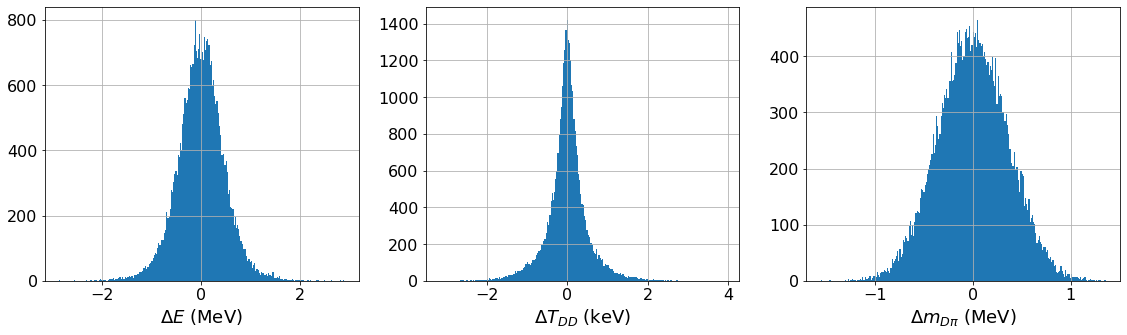

In [13]:
fig, ax = plt.subplots(ncols=3, figsize=(16,5))
ax[0].hist(se - e, bins=250);
ax[0].grid()
ax[0].set_xlabel(r'$\Delta E$ (MeV)')

ax[1].hist((stdd - tdd)*10**3, bins=250);
ax[1].grid()
ax[1].set_xlabel(r'$\Delta T_{DD}$ (keV)')

ax[2].hist((smd1pi - md1pi)*10**3, bins=250);
ax[2].grid()
ax[2].set_xlabel(r'$\Delta m_{D\pi}$ (MeV)');
fig.tight_layout()

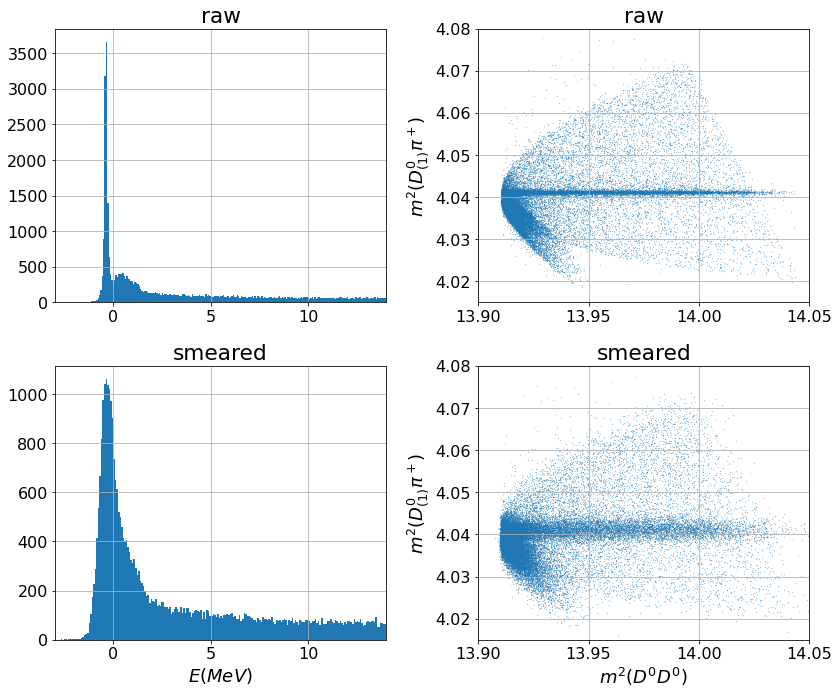

In [14]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))
ax[0,0].hist(e, bins=250);
ax[0,0].set_xlim((-3, 14))
ax[0,0].grid()
ax[0,0].set_title('raw')
ax[0,1].scatter(mddsq, md1pisq, marker='.', s=0.1);
ax[0,1].set_ylabel(r'$m^2(D^0_{(1)}\pi^+)$')
ax[0,1].set_ylim((4.015, 4.08))
ax[0,1].set_xlim((13.90, 14.05))
ax[0,1].grid()
ax[0,1].set_title('raw')
ax[1,0].hist(se, bins=250);
ax[1,0].set_xlim((-3, 14))
ax[1,0].grid()
ax[1,0].set_xlabel(r'$E (MeV)$')
ax[1,0].set_title('smeared')
ax[1,1].scatter(smddsq, smd1pisq, marker='.', s=0.1);
ax[1,1].set_ylabel(r'$m^2(D^0_{(1)}\pi^+)$')
ax[1,1].set_xlabel(r'$m^2(D^0D^0)$')
ax[1,1].set_ylim((4.015, 4.08))
ax[1,1].set_xlim((13.90, 14.05))
ax[1,1].grid()
ax[1,1].set_title('smeared')
fig.tight_layout()

# 5D simulation

In [15]:
# mc5 = np.load('mc_ddpip_5d.npy')
# mc5.shape

In [16]:
# fig, ax = plt.subplots(ncols=3, figsize=(16,5))
# ax[0].hist(mc5[:,0], bins=250);
# ax[1].scatter(mc5[:,1], mc5[:,2], marker='.', s=0.1)
# ax[2].scatter(mc5[:,3], mc5[:,4], marker='.', s=0.1);

In [17]:
# fig, ax = plt.subplots(ncols=2, figsize=(16,7))
# ax[0].hist(mc5[:,3], bins=150);
# ax[1].hist(mc5[:,4], bins=150);

In [18]:
# fig, ax = plt.subplots(ncols=3, figsize=(16,5))
# ax[0].scatter(mc5[:,0], mc5[:,3], marker='.', s=0.1)
# ax[1].scatter(mc5[:,0], mc5[:,4], marker='.', s=0.1)
# ax[2].scatter(mc5[:,3], mc5[:,4], marker='.', s=0.1);

In [19]:
# fig, ax = plt.subplots(figsize=(16,5))
# m1 = mc5[:,4] > 1.65
# ax.hist(mc5[m1,0], bins=100, alpha=0.6, range=(-0.8,0));
# ax.hist(mc5[~m1,0], bins=100, alpha=0.6, range=(-0.8,0));